<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/DataMining_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating KMeans

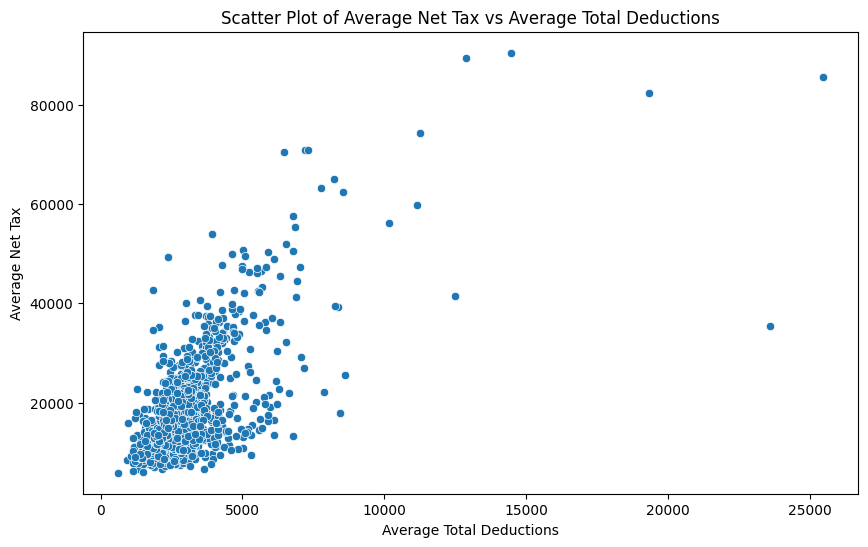

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data
tax_data = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/taxstats2015.csv')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tax_data, x="Average total deductions", y="Average net tax")
plt.title("Scatter Plot of Average Net Tax vs Average Total Deductions")
plt.xlabel("Average Total Deductions")
plt.ylabel("Average Net Tax")
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
file_url = "https://raw.githubusercontent.com/fenago/datasets/main/taxstats2015.csv"

In [ ]:
df = pd.read_csv(file_url, usecols=['Postcode', 'Average net tax', 'Average total deductions'])
df.head()

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430


In [ ]:
df.tail()

,Postcode,Average total deductions,Average net tax
2468,870,2377,14788
2469,872,1218,9017
2470,880,2309,16574
2471,885,3039,28795
2472,886,2191,18141


In [ ]:
# Instantiate the algo (KMeans)... .fit the data to the model... .predict()
kmeans = KMeans(random_state=42)

In [ ]:
?kmeans

In [ ]:
X = df[['Average net tax', 'Average total deductions']]

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [ ]:
y_preds = kmeans.predict(X)
y_preds

array([1, 1, 4, ..., 4, 1, 4], dtype=int32)

In [ ]:
import sklearn

sklearn.__version__

'1.2.2'

In [ ]:
df['cluster'] = y_preds
df.sample(10)

,Postcode,Average total deductions,Average net tax,cluster
1851,5235,2577,11961,7
1543,4560,2227,12548,7
160,2196,2099,10995,0
809,3214,1886,9030,0
2319,6716,2058,35332,3
165,2203,2637,17980,4
870,3302,2371,19444,5
44,2060,8374,39174,3
533,2765,2487,15271,4
843,3265,3251,12007,7


# Analyze KMeans

In [ ]:
import numpy as np
df.pivot_table(values=['Average net tax', 'Average total deductions'], index='cluster', aggfunc=np.mean)

,Average net tax,Average total deductions
cluster,,
0,10061.908408,2170.424925
1,26765.963235,3498.676471
2,79316.875000,13057.750000
3,36197.407895,4789.328947
4,16233.387500,2644.829167
5,20360.962264,2910.710692
6,51412.703704,6234.333333
7,12904.741470,2468.526247


## Visualize Your Clusters

In [ ]:
import altair as alt

In [ ]:
chart = alt.Chart(df)
scatter_plot = chart.mark_circle()

In [ ]:
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster:N')

alt.Chart(...)

In [ ]:
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster:N', tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']).interactive()

alt.Chart(...)

In [ ]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 10)
inertia = []

In [ ]:
for k in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=k, random_state=8).fit(X)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1.586459e+11
1,2,6.655056e+10
2,3,3.708316e+10
3,4,2.253880e+10
4,5,1.571901e+10
5,6,1.152075e+10
6,7,8.776012e+09
7,8,7.280179e+09
8,9,5.999920e+09


In [ ]:
alt.Chart(clusters).mark_line().encode(x='cluster_range', y='inertia')

alt.Chart(...)

In [ ]:
kmeans = KMeans(random_state=42, n_clusters=3)
kmeans.fit(X)
df['cluster2'] = kmeans.predict(X)
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster2:N', tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']).interactive()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


alt.Chart(...)

In [ ]:
?kmeans

In [ ]:
kmeans = KMeans(random_state=42, n_clusters=3, init='random', n_init=1)
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=1, random_state=42)

In [ ]:
df['cluster3'] = kmeans.predict(X)
alt.Chart(df).mark_circle()\
             .encode(x='Average net tax', \
                     y='Average total deductions', \
                     color='cluster3:N', \
                     tooltip=['Postcode', 'cluster', \
                              'Average net tax', \
                              'Average total deductions']) \
             .interactive()

alt.Chart(...)

In [ ]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X)
df['cluster4'] = kmeans.predict(X)
alt.Chart(df).mark_circle()\
             .encode(x='Average net tax', \
                     y='Average total deductions', \
                     color='cluster4:N', \
                     tooltip=['Postcode', 'cluster', \
                              'Average net tax', \
                              'Average total deductions'])\
                    .interactive()

alt.Chart(...)